In [2]:
import numpy as np

# Geçiş matrisi (T)
T = np.array([
    [0.1, 0.6, 0.2, 0.1],
    [0.3, 0.4, 0.2, 0.1],
    [0.3, 0.3, 0.3, 0.1],
    [0.5, 0.2, 0.1, 0.2]
])

# Koşullu olasılık hesaplama
def conditional_probability(sequence):
    prob = 1.0
    for i in range(len(sequence) - 1):
        s_current = sequence[i]
        s_next = sequence[i + 1]
        prob *= T[s_current][s_next]
    return prob

# Örnek durum dizisi: s0 -> s1 -> s3 (Giriş -> Elektronik -> Fizik)
sequence = [0, 1, 3]
probability = conditional_probability(sequence)

# Anomali tespiti
threshold = 0.10
is_anomaly = probability < threshold

print(f"Durum dizisi olasılığı: {probability}")
print(f"Anomalik mi?: {'Evet' if is_anomaly else 'Hayır'}")


Durum dizisi olasılığı: 0.06
Anomalik mi?: Evet


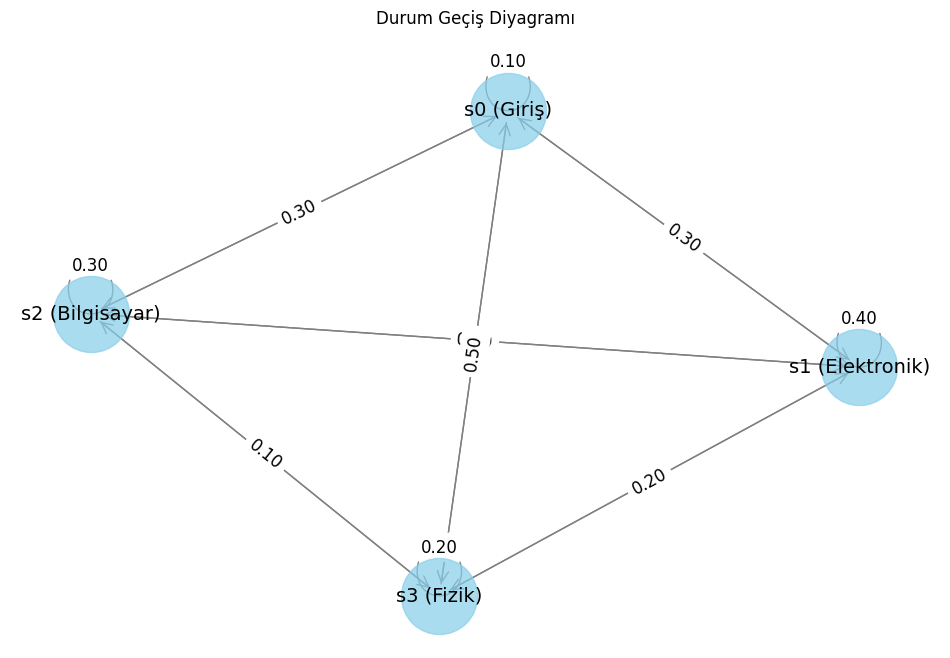

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Geçiş matrisi (T)
T = np.array([
    [0.1, 0.6, 0.2, 0.1],
    [0.3, 0.4, 0.2, 0.1],
    [0.3, 0.3, 0.3, 0.1],
    [0.5, 0.2, 0.1, 0.2]
])

# Durum adları
states = ["s0 (Giriş)", "s1 (Elektronik)", "s2 (Bilgisayar)", "s3 (Fizik)"]

# Ağı oluştur
G = nx.DiGraph()  # Yönlü (directed) bir grafik

# Geçiş matrisi kullanarak düğümler ve kenarlar ekleyin
for i in range(len(states)):
    for j in range(len(states)):
        if T[i][j] > 0:  # Olasılık sıfır değilse kenarı çiz
            G.add_edge(states[i], states[j], weight=T[i][j])

# Ağı çizdir
pos = nx.spring_layout(G)  # Düğümler için düzenleme (dairesel veya rastgele de kullanılabilir)
plt.figure(figsize=(12, 8))

# Düğümler
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="skyblue", alpha=0.7)

# Kenarlar
edges = nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="gray")

# Kenarlara geçiş olasılıklarını ekleyin
edge_labels = {(states[i], states[j]): f"{T[i][j]:.2f}" for i in range(len(states)) for j in range(len(states)) if T[i][j] > 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Düğüm etiketleri
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif")

plt.title("Durum Geçiş Diyagramı")
plt.axis("off")  # Eksenleri kapat
plt.show()


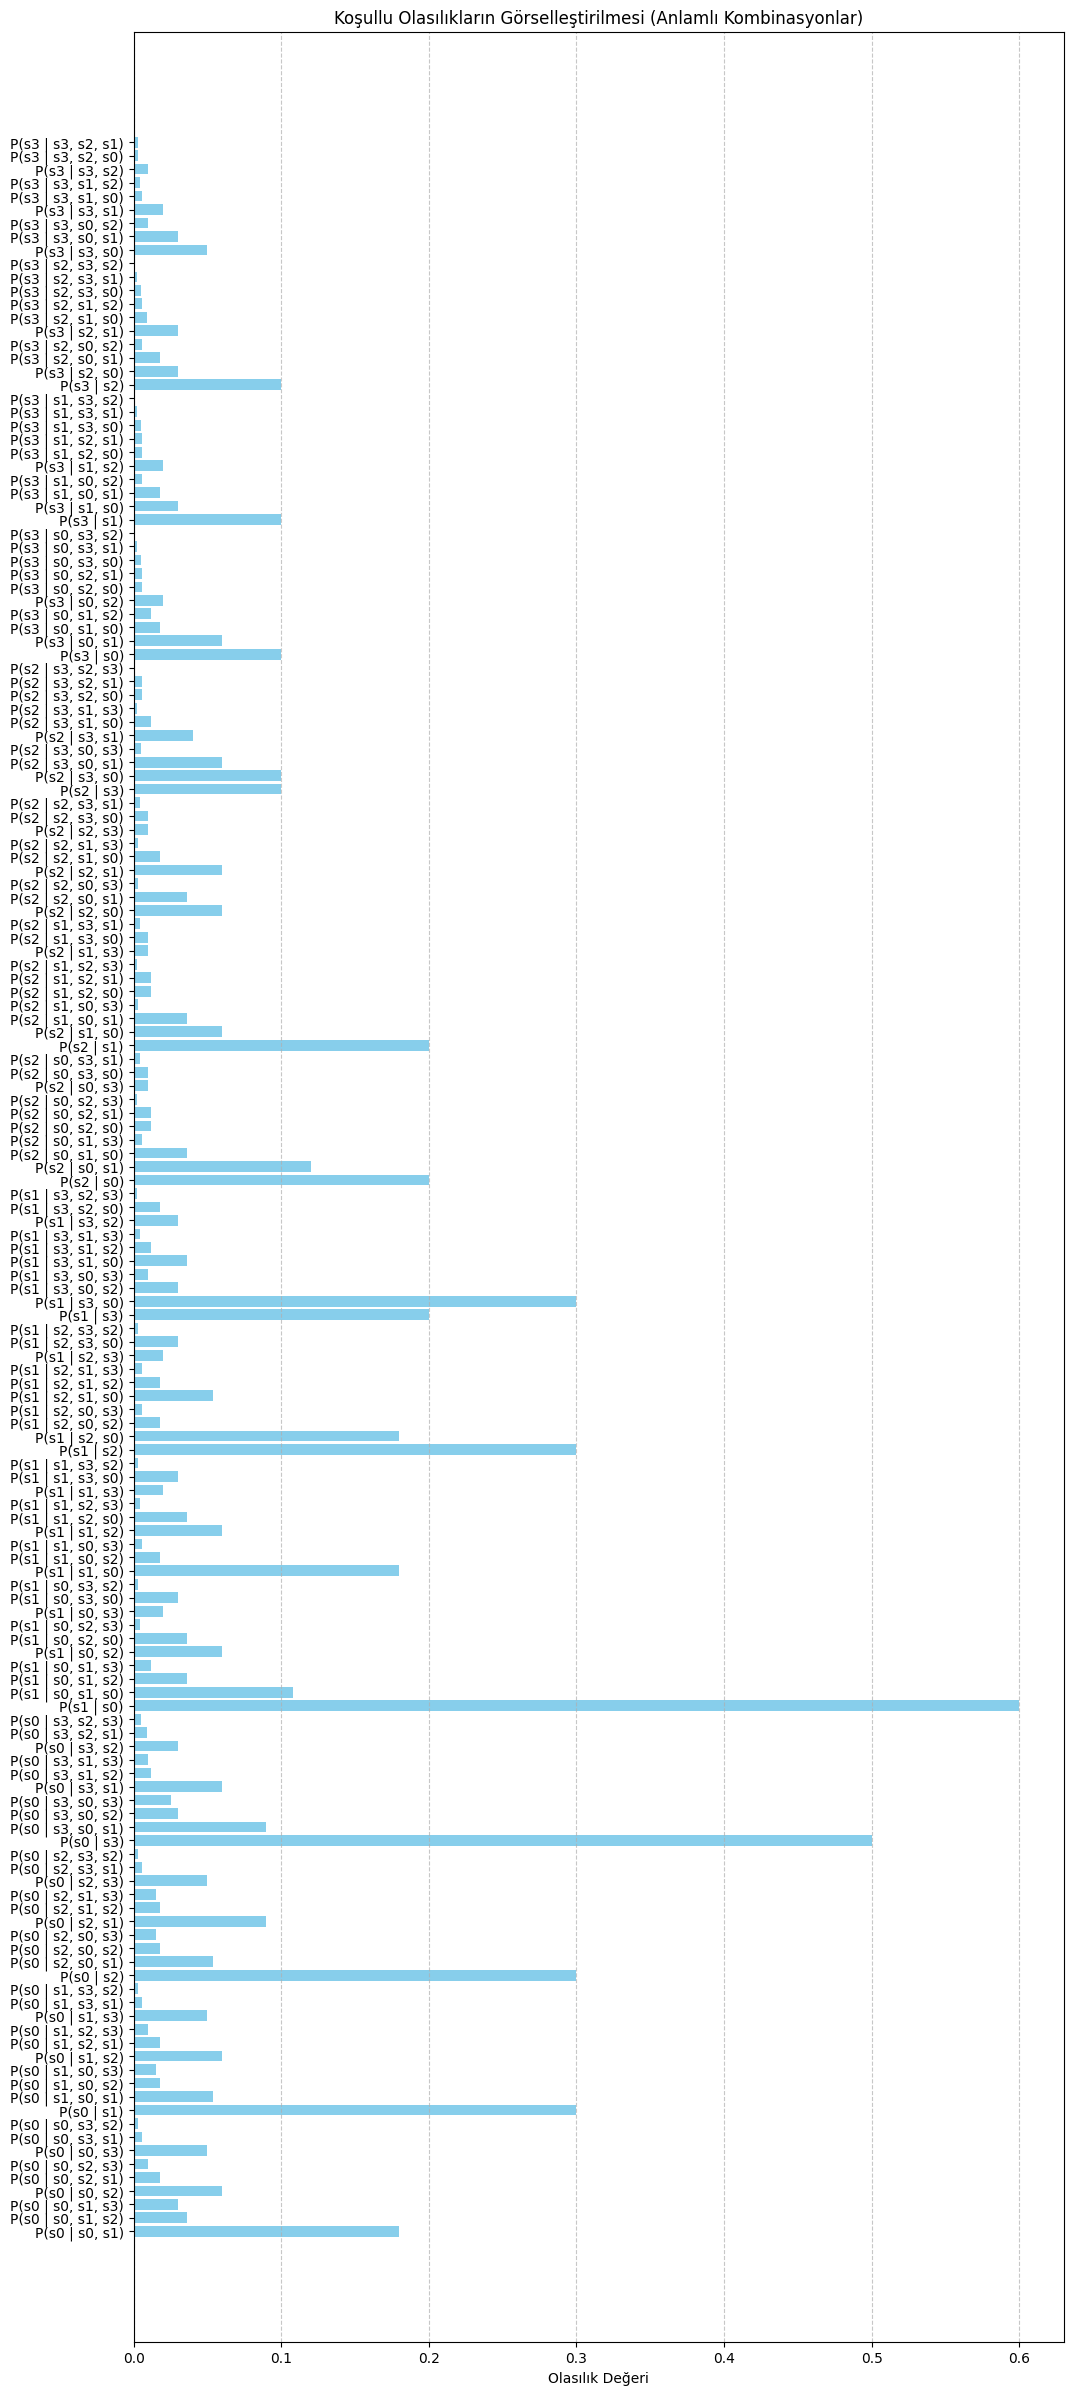

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Geçiş matrisi (T)
T = np.array([
    [0.1, 0.6, 0.2, 0.1],
    [0.3, 0.4, 0.2, 0.1],
    [0.3, 0.3, 0.3, 0.1],
    [0.5, 0.2, 0.1, 0.2]
])

# Durum adları
states = ["s0", "s1", "s2", "s3"]

# 3 ve daha fazla adımlı koşullu olasılıklar için sadece geçerli (anlamlı) kombinasyonları seçelim.
conditional_probabilities = {}

# Tek adımlık koşullu olasılıklar (örneğin: P(s1|s0))
for i in range(len(states)):
    for j in range(len(states)):
        if i != j:
            conditional_probabilities[f"P({states[j]} | {states[i]})"] = T[i, j]

# İki adımlık koşullu olasılıklar (örneğin: P(s2|s0,s1))
for i in range(len(states)):
    for j in range(len(states)):
        for k in range(len(states)):
            if i != j and j != k:  # Aynı duruma tekrar dönmeyen kombinasyonlar
                conditional_probabilities[f"P({states[k]} | {states[i]}, {states[j]})"] = T[i, j] * T[j, k]

# Üç adımlık koşullu olasılıklar (örneğin: P(s3|s0,s1,s2))
for i in range(len(states)):
    for j in range(len(states)):
        for k in range(len(states)):
            for l in range(len(states)):
                if i != j and j != k and k != l:  # Farklı durumlar
                    conditional_probabilities[f"P({states[l]} | {states[i]}, {states[j]}, {states[k]})"] = T[i, j] * T[j, k] * T[k, l]

# Koşullu olasılıkları anahtara göre sırala ve görselleştir
sorted_probs = sorted(conditional_probabilities.items())

# Çubuk grafik ile görselleştir
labels, values = zip(*sorted_probs)

plt.figure(figsize=(12, 30))
plt.barh(labels, values, color="skyblue")
plt.xlabel("Olasılık Değeri")
plt.title("Koşullu Olasılıkların Görselleştirilmesi (Anlamlı Kombinasyonlar)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
